In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler 

import warnings
warnings.filterwarnings('ignore')

dates = pd.read_csv('Online_Dating_Behavior_Dataset.csv')
import matplotlib.pyplot as plt 
dates

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness,Matches
0,0,1,51777,3,47,5,70
1,1,0,36646,0,42,7,130
2,0,0,53801,1,25,5,0
3,0,0,56105,0,35,8,0
4,0,0,55597,1,36,6,0
...,...,...,...,...,...,...,...
995,0,0,36799,0,28,1,0
996,0,1,43882,2,46,9,70
997,1,0,49629,2,49,6,120
998,1,0,45706,1,22,8,140


In [44]:
dates.isna().sum()

Gender            0
PurchasedVIP      0
Income            0
Children          0
Age               0
Attractiveness    0
Matches           0
dtype: int64

In [45]:
dates.dtypes

Gender            int64
PurchasedVIP      int64
Income            int64
Children          int64
Age               int64
Attractiveness    int64
Matches           int64
dtype: object

In [46]:
dates[dates.duplicated()]

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness,Matches


In [47]:
dates ['Gender'].value_counts()

Gender
1    510
0    490
Name: count, dtype: int64

In [48]:
dates ['PurchasedVIP'].value_counts()

PurchasedVIP
0    526
1    474
Name: count, dtype: int64

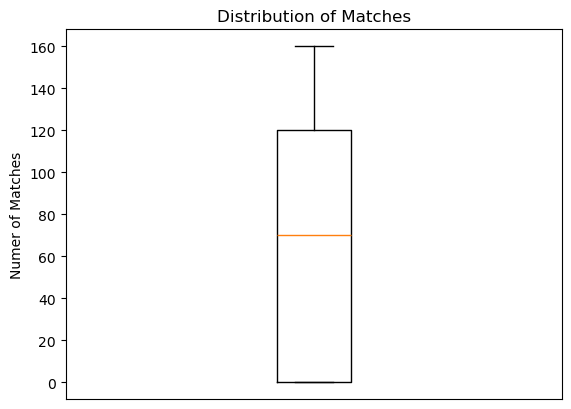

In [49]:
plt.boxplot(dates['Matches'])


plt.title('Distribution of Matches')
plt.ylabel ('Numer of Matches')
plt.xticks([])

plt.show()

In [50]:
dates.rename(columns = {'Matches': 'Number of Matches'}, inplace = True)

In [51]:
def categorize(score):
    if score >= 100:
        return "high"
    elif score >= 50:
        return "average"
    else:
        return "low"
dates["Match"] = dates["Number of Matches"].apply(categorize)


In [52]:
dates

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness,Number of Matches,Match
0,0,1,51777,3,47,5,70,average
1,1,0,36646,0,42,7,130,high
2,0,0,53801,1,25,5,0,low
3,0,0,56105,0,35,8,0,low
4,0,0,55597,1,36,6,0,low
...,...,...,...,...,...,...,...,...
995,0,0,36799,0,28,1,0,low
996,0,1,43882,2,46,9,70,average
997,1,0,49629,2,49,6,120,high
998,1,0,45706,1,22,8,140,high


In [62]:
x = dates[['Gender', 'PurchasedVIP', 'Income', 'Children', 'Age', 'Attractiveness']]  
y = dates['Match'] 
scaler = StandardScaler()
x_sc = scaler.fit_transform(x)  

In [66]:
k_values = [i for i in range (1,31)]
accuracies = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_sc, y)
    score = np.mean(scores)
    accuracies[k] = score


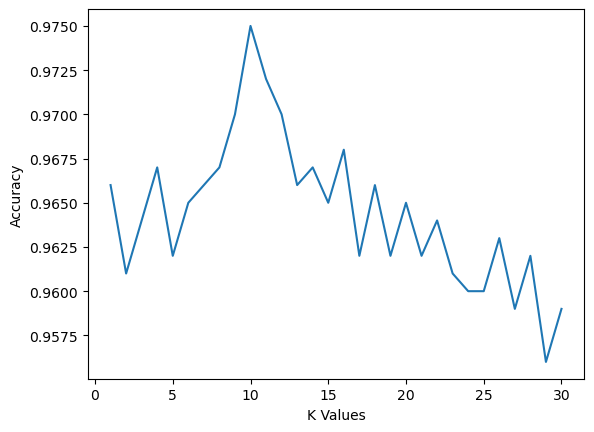

In [55]:
plt.plot(k_values, accuracies.values())
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.show()

In [56]:
max_val = max(accuracies.values())
max_pairs = []
for k, score in accuracies.items():
    if score == max_val:
        max_pairs.append([k, score])
max_pairs

[[10, 0.975]]

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x_sc, y, train_size = 0.8, test_size=0.2, random_state=4)
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)



In [82]:
model = KNeighborsClassifier(n_neighbors = 10)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [86]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)



Accuracy: 0.97


In [60]:
dates.head()

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness,Number of Matches,Match
0,0,1,51777,3,47,5,70,average
1,1,0,36646,0,42,7,130,high
2,0,0,53801,1,25,5,0,low
3,0,0,56105,0,35,8,0,low
4,0,0,55597,1,36,6,0,low


In [98]:
new = [[0, 0, 51350, 0, 33, 5]]  
new_data_scaled = sc.transform(new_data)
prediction = model.predict(new_data_scaled)
print("Prediction:", prediction[0])

Prediction: high


In [100]:
new = [[0, 1, 51350, 0, 33, 5]]  
new_data_scaled = sc.transform(new_data)
prediction = model.predict(new_data_scaled)
print("Prediction:", prediction[0])

Prediction: high


In [102]:
new = [[0, 0, 9.48, 51350, 0, 0.977, 33, 55]]
new = sc.transform(new)
new_pred = model.predict(new)
new_pred[0]

ValueError: X has 8 features, but StandardScaler is expecting 6 features as input.